In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('../../src'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

/home/enis/projects/nna/src


In [5]:
import numpy as np

In [6]:
dataPath= "/home/enis/projects/nna/results/predictions/8tags_on_8sites_pathV2.npy"

In [10]:
data2check=np.load(dataPath,allow_pickle=True)[()]

In [17]:
data2check2.keys()

dict_keys(['Neural Net_Songbird', 'Neural Net_Water Bird', 'Neural Net_Insect', 'Neural Net_Running Water', 'Neural Net_Rain', 'Neural Net_Cable', 'Neural Net_Wind', 'Neural Net_Aircraft'])

In [18]:
data2check2['Neural Net_Songbird']

{PosixPath('/tank/data/nna/real/stinchcomb/05-Colville5/2016/CLVL5_20160602_163306.MP3'): array([0., 0., 0., ..., 1., 1., 0.]),
 PosixPath('/tank/data/nna/real/stinchcomb/05-Colville5/2016/CLVL5_20160604_181421.MP3'): array([0., 1., 1., ..., 1., 1., 0.]),
 PosixPath('/tank/data/nna/real/stinchcomb/05-Colville5/2016/CLVL5_20160606_195535.MP3'): array([1., 1., 0., ..., 1., 1., 1.]),
 PosixPath('/tank/data/nna/real/stinchcomb/05-Colville5/2016/CLVL5_20160608_213649.MP3'): array([1., 1., 1., ..., 1., 1., 1.]),
 PosixPath('/tank/data/nna/real/stinchcomb/05-Colville5/2016/CLVL5_20160610_231803.MP3'): array([1., 0., 1., ..., 1., 1., 1.]),
 PosixPath('/tank/data/nna/real/stinchcomb/05-Colville5/2016/CLVL5_20160613_005919.MP3'): array([1., 1., 1., ..., 1., 1., 1.]),
 PosixPath('/tank/data/nna/real/stinchcomb/05-Colville5/2016/CLVL5_20160615_024034.MP3'): array([1., 1., 1., ..., 1., 1., 1.]),
 PosixPath('/tank/data/nna/real/stinchcomb/05-Colville5/2016/CLVL5_20160617_042148.MP3'): array([1., 1.,

In [19]:
thepath='/scratch/enis/data/nna/real/stinchcomb/09-USGS/2016/USGS_20160603_151612_SONGBIRD/'

In [25]:
# list_files(str(thepath))
import glob
files=(glob.glob(thepath+"*"))
files.sort()

In [29]:
aa=[]
for f in files:
    a=np.load(f)
    aa.append(a)

In [33]:
bb=np.concatenate(aa)

In [34]:
bb.shape

(17887,)

In [36]:
hour,minute,second=15,16,12


In [37]:
sum(bb)

11089.0

In [38]:
bb.shape

(17887,)

In [42]:
178870/3600

49.68611111111111

In [48]:
from datetime import datetime,timedelta

In [46]:
datetime1=datetime(year=2016,month=6,day=3,hour=hour,minute=minute,second=second)

In [49]:
datetime1+timedelta(seconds=178870)

datetime.datetime(2016, 6, 5, 16, 57, 22)

In [50]:
datetime(2016, 6, 5, 16, 57, 22)

datetime.datetime(2016, 6, 5, 16, 57, 22)

In [51]:
import os
import sys

module_path = os.path.abspath(os.path.join('../../src'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

/home/enis/projects/nna/src


In [52]:
import csv 
from pathlib import Path
from os import listdir
import pickle

from labeling_utils import load_labels

import numpy as np
from sklearn.metrics import precision_recall_fscore_support


# tags=["Songbird","Water Bird","Insect","Running Water","Rain","Cable","Wind","Vehicle","Aircraft"]
tags=["Songbird","Water Bird","Insect","Running Water","Rain","Cable","Wind","Aircraft"]

from tabulate import tabulate
tag_set=tags[:]


In [53]:
#LOAD MODEL predictions
splits_path= Path('/files/scratch/enis/data/nna/labeling/splits/')

labelsbymodelpath=Path('/scratch/enis/data/nna/labeling/deep_labels/')
dbfile = open(labelsbymodelpath / "classifications_all_2.pkl", 'rb')  
modelresults = pickle.load(dbfile) 
dbfile.close() 

In [394]:
# LOAD LABELS by human
labelsbyhumanpath=Path('/scratch/enis/data/nna/labeling/resultsReal/')
# filter by username
labelsbyhuman=[i for i in listdir(labelsbyhumanpath) if (".csv" in i) ]

humanresults={}
counter=0
for apath in labelsbyhuman:
    with open(labelsbyhumanpath / apath, newline='') as f:
        reader=csv.reader(f)
        for row in reader:
            counter+=1
            humanresults[row[0]]=row[1:]

print("unique files:",len(humanresults),"\ntotal files",counter)

unique files: 91 
total files 91


In [395]:
#Join vehicle and Aircraft
for file_name,tagshere in humanresults.items():
#     print(file_name,tagshere)
    
    tagshere=["Aircraft" if tag == "Vehicle" else tag for tag in tags]

In [402]:
histogram={}
hist2={}
for file_name in humanresults:
    pr=humanresults[file_name]
    place_name=file_name.split("_")[0]
#     print(file_name)
    histogram.setdefault(place_name,0)
    for a in pr:
        hist2.setdefault(a,0)
        hist2[a]+=1
    histogram[place_name]+=1

In [403]:
hist2

{'Clipping': 67,
 'Songbird': 25,
 'Wind': 18,
 'Water Bird': 12,
 'Aircraft': 2,
 'Running Water': 2,
 'Insect': 2}

In [400]:
a=list(histogram.items())
a.sort(key=lambda x:x[1],reverse=True)
# a

In [404]:
# load name of the labels
labels=load_labels()

In [405]:
def vectorized_y_true(humanresults,tag_set):
    y_true={tag: [None]*len(humanresults) for tag in tag_set}
    for i,tags in enumerate(humanresults.values()):
        # we  only look for tags in tag_set
        for tag in tag_set:
            if tag in tags:
                y_true[tag][i] = 1
            else:
                y_true[tag][i] = 0 
    return y_true

In [406]:
y_true_dict=vectorized_y_true(humanresults,tag_set)


In [408]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_auc_score


In [409]:
classifier_model_path='../../src/assets/sklearnModels/Songbird_Neural Net_Raw_many2one_2020-03-02--14-06.joblib'



In [410]:
import joblib
classifier_model=joblib.load(classifier_model_path)

In [411]:
def many2one_predict(X,clf):
    if X.size==0:
        return X
    res=clf.predict(X)
    res=np.append(res,[0]*(-res.size%10)) if res.size%10!=0 else res
    res=res.reshape(-1,10)
    res=np.max(res,axis=1)
    return res

In [420]:
humanresults

{'S4A10276_20190617_134602_55m_14s__55m_24s.flac': ['Clipping'],
 'S4A10262_20190530_211602_22m_39s__22m_49s.flac': ['Clipping'],
 'S4A10272_20190520_074602_42m_27s__42m_37s.flac': ['Songbird'],
 'S4A10209_20190509_224602_52m_27s__52m_37s.flac': ['Clipping'],
 'S4A10262_20190613_223000_51m_42s__51m_52s.flac': ['Songbird', 'Clipping'],
 'S4A10258_20190524_230000_71m_13s__71m_23s.flac': ['Clipping'],
 'S4A10268_20190611_111602_18m_39s__18m_49s.flac': ['Clipping'],
 'S4A10283_20190603_140000_2m_12s__2m_22s.flac': ['Clipping'],
 'S4A10275_20190531_020000_11m_21s__11m_31s.flac': ['Clipping'],
 'S4A10266_20190517_224602_13m_56s__14m_6s.flac': ['Clipping'],
 'S4A10284_20190526_083000_36m_17s__36m_27s.flac': ['Clipping'],
 'S4A10284_20190524_151602_20m_19s__20m_29s.flac': ['Clipping'],
 'S4A10262_20190602_090000_28m_15s__28m_25s.flac': ['Clipping'],
 'S4A10268_20190510_131602_27m_15s__27m_25s.flac': ['Clipping'],
 'S4A10292_20190610_171602_61m_11s__61m_21s.flac': ['Songbird', 'Wind'],
 'S4A102

In [412]:
split_path=Path('/scratch/enis/data/nna/labeling/split_real_embeddings/')
# filter by username
split_embeds=[i for i in listdir(split_path) ]
raw_embeds =  [i for i in split_embeds if "rawembed" in i]
proc_embeds = [i for i in split_embeds if "_embed" in i]

In [421]:
import copy
def pick_embed(embed_type):
    # humanresults[proc_embeds[0].replace("_embed.npy",".mp3")]
    X=[]
    for i in humanresults:
        if embed_type=="Raw":
            file_name=i.replace(".flac","_rawembed.npy")
        elif embed_type=="Normalized":
            file_name=i.replace(".flac","_embed.npy")
        else:
            raise Exception("ERROR with embed type")
        an_x=np.load(split_path / file_name)
        X.append(an_x)
    return np.array(X)

def map_reduce(X,y_true_dict,func_type):
    X_copy=X[:]
    # X.shape --> (1300, 10, 128)
    y_true_dict_copy=copy.deepcopy(y_true_dict)
    if func_type=="Average":
        return np.mean(X_copy,axis=1),y_true_dict_copy
    elif func_type=="Concat":
        return np.reshape(X_copy,(-1,1280)),y_true_dict_copy
    elif func_type=="many2one":
        return np.reshape(X_copy,(-1,1280)),y_true_dict_copy
    else:
        raise Exception("ERROR with embed type")
        
def pick_embedsv2(split_path,fileNames):
    # humanresults[proc_embeds[0].replace("_embed.npy",".mp3")]
    X=[]
    for file_name in fileNames:
        an_x=np.load(split_path / file_name)
        X.append(an_x)
    return np.concatenate(X)

In [103]:
earlierModelpath="/home/enis/projects/nna/results/models/raw_many2one_NN_12_04_Y-00:18.pkl"


In [112]:

import pickle
# pickle.dumps(all_models['Raw_many2one'],open("raw_many2one_NN", 'wb'))
earlierModel = pickle.load(open(earlierModelpath, 'rb'))
earlierModel=earlierModel['Neural Net_Songbird']

In [422]:
aaa=pick_embed("Raw")

In [423]:
X=aaa

In [258]:
VggFilesFolder="/scratch/enis/data/nna/real/stinchcomb/09-USGS/2016/USGS_20160603_151612_vgg/"
VggFilesFolder="/scratch/enis/data/nna/real/stinchcomb/09-USGS/2016/USGS_20160603_151612_vgg/"

split_path=Path(VggFilesFolder)
# filter by username
split_embeds=[i for i in listdir(split_path) ]
raw_embeds =  sorted([i for i in split_embeds if "rawembed" in i])
proc_embeds = sorted([i for i in split_embeds if "_embed" in i])

VggFilesRaw= pick_embedsv2(split_path,raw_embeds)


In [439]:
os.listdir("/scratch/enis/data/nna/real/anwr/31/2019/S4A10297_20190504*_vgg")

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/enis/data/nna/real/anwr/31/2019/S4A10297_20190504*_vgg'

In [444]:
# !ls /scratch/enis/data/nna/real/anwr/31/2019/S4A10297_20190504*_vgg/*
firstDay="""
/scratch/enis/data/nna/real/anwr/31/2019/S4A10297_20190504_000000_vgg/S4A10297_20190504_000000_embeddings000.npy
/scratch/enis/data/nna/real/anwr/31/2019/S4A10297_20190504_000000_vgg/S4A10297_20190504_000000_rawembeddings000.npy
/scratch/enis/data/nna/real/anwr/31/2019/S4A10297_20190504_011602_vgg/S4A10297_20190504_011602_embeddings000.npy
/scratch/enis/data/nna/real/anwr/31/2019/S4A10297_20190504_011602_vgg/S4A10297_20190504_011602_rawembeddings000.npy
/scratch/enis/data/nna/real/anwr/31/2019/S4A10297_20190504_043000_vgg/S4A10297_20190504_043000_embeddings000.npy
/scratch/enis/data/nna/real/anwr/31/2019/S4A10297_20190504_043000_vgg/S4A10297_20190504_043000_rawembeddings000.npy
/scratch/enis/data/nna/real/anwr/31/2019/S4A10297_20190504_054602_vgg/S4A10297_20190504_054602_embeddings000.npy
/scratch/enis/data/nna/real/anwr/31/2019/S4A10297_20190504_054602_vgg/S4A10297_20190504_054602_rawembeddings000.npy
/scratch/enis/data/nna/real/anwr/31/2019/S4A10297_20190504_093000_vgg/S4A10297_20190504_093000_embeddings000.npy
/scratch/enis/data/nna/real/anwr/31/2019/S4A10297_20190504_093000_vgg/S4A10297_20190504_093000_rawembeddings000.npy
/scratch/enis/data/nna/real/anwr/31/2019/S4A10297_20190504_104602_vgg/S4A10297_20190504_104602_embeddings000.npy
/scratch/enis/data/nna/real/anwr/31/2019/S4A10297_20190504_104602_vgg/S4A10297_20190504_104602_rawembeddings000.npy
/scratch/enis/data/nna/real/anwr/31/2019/S4A10297_20190504_140000_vgg/S4A10297_20190504_140000_embeddings000.npy
/scratch/enis/data/nna/real/anwr/31/2019/S4A10297_20190504_140000_vgg/S4A10297_20190504_140000_rawembeddings000.npy
/scratch/enis/data/nna/real/anwr/31/2019/S4A10297_20190504_151602_vgg/S4A10297_20190504_151602_embeddings000.npy
/scratch/enis/data/nna/real/anwr/31/2019/S4A10297_20190504_151602_vgg/S4A10297_20190504_151602_rawembeddings000.npy
/scratch/enis/data/nna/real/anwr/31/2019/S4A10297_20190504_190000_vgg/S4A10297_20190504_190000_embeddings000.npy
/scratch/enis/data/nna/real/anwr/31/2019/S4A10297_20190504_190000_vgg/S4A10297_20190504_190000_rawembeddings000.npy
/scratch/enis/data/nna/real/anwr/31/2019/S4A10297_20190504_201602_vgg/S4A10297_20190504_201602_embeddings000.npy
/scratch/enis/data/nna/real/anwr/31/2019/S4A10297_20190504_201602_vgg/S4A10297_20190504_201602_rawembeddings000.npy
/scratch/enis/data/nna/real/anwr/31/2019/S4A10297_20190504_233000_vgg/S4A10297_20190504_233000_embeddings000.npy
/scratch/enis/data/nna/real/anwr/31/2019/S4A10297_20190504_233000_vgg/S4A10297_20190504_233000_rawembeddings000.npy
"""

firstDayFiles=list(filter(lambda x: "raw" in x, firstDay.split("\n")[1:]))
firstDayFiles.sort()


In [496]:
an_x.shape

(4560, 128)

0
2
7078
2
8878
2
7078
2
8878
2
7078


In [391]:
SONGBIRDFolder="/scratch/enis/data/nna/real/stinchcomb/09-USGS/2016/USGS_20160603_151612_SONGBIRD/"
SONGBIRDFolder=Path(SONGBIRDFolder)
songbirdPreds=sorted([i for i in listdir(SONGBIRDFolder) ])
songbirdPreds= pick_embedsv2(SONGBIRDFolder,songbirdPreds)
songbirdPreds=songbirdPreds.reshape(-1,1)



In [492]:
classifier_modelResultP.shape

(7, 720)

In [535]:
.shape

(567040, 1)

In [545]:
X=[]

    
endold=0
for f in firstDayFiles:
    an_x=np.load(f)
    passed=an_x.shape[0]
    x=(f.split("/")[-1].split("_")[2])
    hour,minute,second=[ int(x[i:i+2]) for i in range(0, len(x), 2) ]
    start=(hour*3600)+(minute*60)+(second)
    end=start+passed
#     print(start-endold,hour)
    print(start/7200,end/7200)
#     if start-endold>0:
#         zeros=np.zeros(((start-endold)//10,1))
#         X.append(zeros)

    an_x=an_x.reshape(-1,1)
    an_x=an_x[:(an_x.shape[0]//1280)*1280,:]
    an_x,y_dict=map_reduce(an_x,{},"many2one")
    an_x=getResults2(an_x,{},[classifier_model],names,tag_set,logs=True,many2one=True)
    X.append(an_x)
#     print(int(hour)-hourold+1,minute,second)
    endold=int(end)



# classifierlater_anwr=np.concatenate(X)


0.0 0.6333333333333333
0.6336111111111111 1.25
2.25 2.8833333333333333
2.883611111111111 3.5
4.75 5.383333333333334
5.383611111111111 6.0
7.0 7.633333333333334
7.633611111111111 8.25
9.5 10.133333333333333
10.133611111111112 10.75
11.75 12.383333333333333


In [516]:
an_x.shape

(456, 1)

In [543]:
visA

[array([0.33945531]),
 array([0.41668319]),
 array([0.14224038]),
 array([0.17361962]),
 array([0.08200306]),
 array([0.04977615]),
 array([0.61800053]),
 array([0.27023856]),
 array([0.05089733]),
 array([0.04238444]),
 array([0.42327845])]

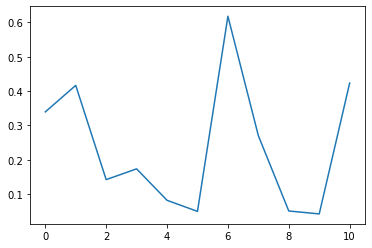

In [542]:
visA=[]
for an_x in X:
    visA.append(np.sum(an_x,axis=0)/an_x.shape[0])
    
plt.plot(visA)
plt.show()

[3.96606813e-01 4.14922988e-01 2.60775595e-01 0.00000000e+00
 1.40319670e-01 4.51567824e-01 4.66862635e-01 1.35552669e-02
 0.00000000e+00 1.40377854e-01 4.51510006e-01 4.69399765e-01
 1.10177714e-02 1.20662603e-04 4.00982715e-01 4.10431527e-01
 2.60770492e-01 0.00000000e+00 1.20664648e-04 4.03760488e-01
 4.07653760e-01 2.60770484e-01 0.00000000e+00 1.47128831e-01
 3.89023867e-01]


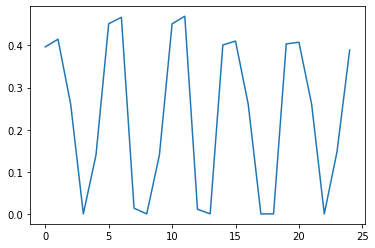

In [537]:
# X=[]
# for file_name in firstDayFiles:
#     an_x=np.load(file_name)
#     X.append(an_x)
# AnwrVgg=np.concatenate(X)
# AnwrVgg=AnwrVgg.reshape(-1,1)
# X_anwr,y_dict=map_reduce(AnwrVgg,{},"many2one")
# names=["MLP"]

# classifierlater_anwr=getResults2(X_anwr,{},[classifier_model],names,tag_set,logs=True,many2one=True)

secondsGather=360
classifier_modelResultP=np.pad(classifierlater_anwr, ((0,secondsGather-(classifierlater_anwr.shape[0]%secondsGather)),(0,0)), 'constant', constant_values=(-1, 0))
classifier_modelResultP=classifier_modelResultP.reshape(-1,secondsGather)
songbirdPredsSum=np.sum(classifier_modelResultP,axis=1)/secondsGather
print(songbirdPredsSum)
import matplotlib.pyplot as plt
plt.plot(songbirdPredsSum)
plt.show()


In [477]:
49550/3600

13.76388888888889

In [463]:
classifierlater_anwr.shape

(4955, 1)

In [456]:
names=["MLP"]
earlierModelResult=get_results(X_transformed,y_true_dict,[earlierModel],names,tag_set,logs=True,many2one=True)
classifier_modelResult=get_results(X_transformed,y_true_dict,[classifier_model],names,tag_set,logs=True,many2one=True)



In [260]:
Vgg_transformed,_=map_reduce(VggFilesRaw,{},"many2one")
# X.shape --> (1300, 10, 128)

In [425]:
X_transformed,y_dict=map_reduce(X,y_true_dict,"many2one")


In [194]:
classifier_model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=84, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [195]:
earlierModel

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [176]:
clf=classifier_model
# clf=earlierModel

In [426]:
names=["MLP"]
earlierModelResult=get_results(X_transformed,y_true_dict,[earlierModel],names,tag_set,logs=True,many2one=True)
classifier_modelResult=get_results(X_transformed,y_true_dict,[classifier_model],names,tag_set,logs=True,many2one=True)



In [268]:
names=["MLP"]
earlierModelResult=getResults2(Vgg_transformed,{},[earlierModel],names,tag_set,logs=True,many2one=True)
classifier_modelResult=getResults2(Vgg_transformed,{},[classifier_model],names,tag_set,logs=True,many2one=True)



In [356]:
threshold=0.5
predearlier=(earlierModelResult > threshold).astype(np.int)
predlater=(classifier_modelResult > threshold).astype(np.int)

In [392]:
# earlierModelResult.reshape(-1,3600)
secondsGather=720
earlierModelResultP=np.pad(predearlier, ((0,secondsGather-(earlierModelResult.shape[0]%secondsGather)),(0,0)), 'constant', constant_values=(-1, 0))
earlierModelResultP=earlierModelResultP.reshape(-1,secondsGather)
earlierModelResultSum=np.sum(earlierModelResultP,axis=1)/secondsGather


classifier_modelResultP=np.pad(predlater, ((0,secondsGather-(earlierModelResult.shape[0]%secondsGather)),(0,0)), 'constant', constant_values=(-1, 0))
classifier_modelResultP=classifier_modelResultP.reshape(-1,secondsGather)
classifier_modelResultSum=np.sum(classifier_modelResultP,axis=1)/secondsGather


classifier_modelResultP=np.pad(songbirdPreds, ((0,secondsGather-(earlierModelResult.shape[0]%secondsGather)),(0,0)), 'constant', constant_values=(-1, 0))
classifier_modelResultP=classifier_modelResultP.reshape(-1,secondsGather)
songbirdPredsSum=np.sum(classifier_modelResultP,axis=1)/secondsGather



In [390]:
sum(songbirdPreds)

array([11089.])

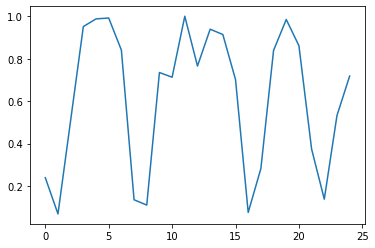

In [393]:
import matplotlib.pyplot as plt
plt.plot(songbirdPredsSum)
plt.show()


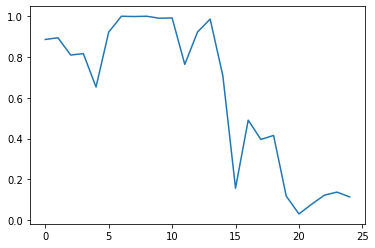

In [358]:
import matplotlib.pyplot as plt
plt.plot(classifier_modelResultSum)
plt.show()


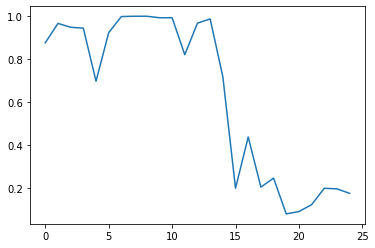

In [359]:
import matplotlib.pyplot as plt
plt.plot(earlierModelResultSum)
plt.show()

In [159]:
from sklearn.metrics import confusion_matrix

In [ ]:
roc_auc_score(y_val,y_val_pred[:,1:])

In [209]:
sum(earlierModelResult[0])

73

In [231]:
count=0
for c,a,b in zip(earlierModelResult[0],predearlier,predmodel):
    if a!=b and c==1:
        print(a,b)
        count+=1
count

1 0
1 0
1 0
1 0
0 1
0 1


6

In [429]:
threshold=0.5
predearlier=(earlierModelResult[1] > threshold).astype(np.int).reshape(-1)
(tn, fp, fn, tp)=confusion_matrix(earlierModelResult[0],predearlier).ravel()
for i in zip((tn, fp, fn, tp),("tn", "fp", "fn", "tp")):
    print(i[1],i[0])
    

tn 32
fp 34
fn 5
tp 20


In [430]:
threshold=0.5
predmodel=(classifier_modelResult[1] > threshold).astype(np.int).reshape(-1)
(tn, fp, fn, tp)=confusion_matrix(classifier_modelResult[0],predmodel).ravel()
for i in zip((tn, fp, fn, tp),("tn", "fp", "fn", "tp")):
    print(i[1],i[0])

tn 24
fp 42
fn 4
tp 21


In [223]:
X_input,y_true_dict=X_transformed,y_true_dict

X_train, X_test, y_train, y_test = train_test_split(
    X_input, y_true_dict[tag], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42)


In [224]:
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn import  metrics
# X, y = datasets.make_classification(random_state=0)
# X_train, X_test, y_train, y_test = model_selection.train_test_split(            X, y, random_state=0)
# clf = svm.SVC(random_state=0)
# clf.fit(X_train, y_train)

metrics.plot_roc_curve(predmodel, X_test, y_test)  # doctest: +SKIP
plt.show()

AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

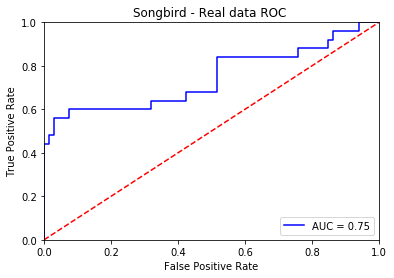

In [432]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
# probs = model.predict_proba(X_test)
# preds = probs[:,1]

# fpr, tpr, threshold = metrics.roc_curve(earlierModelResult[0], classifier_modelResult[1])

fpr, tpr, threshold = metrics.roc_curve(classifier_modelResult[0], classifier_modelResult[1])
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Songbird - Real data ROC ')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [221]:
validation
# threshold=0.5
# predmodel=(classifier_modelResult[1] > threshold).astype(np.int).reshape(-1)
# (tn, fp, fn, tp)=confusion_matrix(classifier_modelResult[0],predmodel).ravel()
# for i in zip((tn, fp, fn, tp),("tn", "fp", "fn", "tp")):
#     print(i[1],i[0])

tn 44
fp 132
fn 5
tp 79


In [193]:
# threshold=0.5
# pred1=(b[1] < threshold).astype(np.int).reshape(-1)
# pred2=(a[1] < threshold).astype(np.int).reshape(-1)
# print("(tn, fp, fn, tp)")
# confusion_matrix(pred1,pred2).ravel()

(tn, fp, fn, tp)


array([195,  16,  19,  30])

In [152]:
for b in zip([1,2],[5,3]):
    print(b)

(1, 5)
(2, 3)


In [156]:
for i in zip(*a,*b):
    print(i)

(1, array([0.99999723]), 1, array([0.99999994]))
(0, array([0.67656621]), 0, array([0.4396293]))
(0, array([0.74866972]), 0, array([0.00514271]))
(1, array([0.99918287]), 1, array([0.33031274]))
(0, array([0.3090745]), 0, array([0.96677882]))
(0, array([0.98858907]), 0, array([0.07915522]))
(0, array([0.99996987]), 0, array([0.99982941]))
(0, array([0.65676598]), 0, array([0.54548656]))
(0, array([0.96783979]), 0, array([0.88124542]))
(1, array([0.99998492]), 1, array([0.99999735]))
(0, array([0.92587703]), 0, array([0.99949117]))
(0, array([0.99409376]), 0, array([0.99891762]))
(0, array([0.99293023]), 0, array([0.76208114]))
(1, array([0.99954635]), 1, array([0.98366473]))
(0, array([0.74914731]), 0, array([0.50540662]))
(0, array([0.93635366]), 0, array([0.92220286]))
(0, array([0.99986629]), 0, array([0.99673434]))
(0, array([0.2723398]), 0, array([0.79113202]))
(1, array([0.82132873]), 1, array([0.62366169]))
(1, array([0.97103691]), 1, array([0.83495587]))
(0, array([0.71914368])

In [93]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    
short_names=['N. Neighbors',
 'Linear SVM',
 'RBF SVM',
 'Gaussian P.',
 'Decision T.',
 'Random F.',
 'NN',
 'AdaBoost',
 'Naive B.',
 'QDA']

def print_result(results):
    headers= ["Tag",]+short_names
    table=[]
#     sample_count=len(next(iter(y_true_dict.values())))
#     print("Total sample:",sample_count,"And threshold is",prob_threshold)
    for tag in (tag_set):
#         positive_count=sum(y_true_dict[tag])
        table.append([tag,*results[tag]])

    print(tabulate(table, headers=headers))

def reverse_results(results,classifierNames=[]):
    results_clf2={}
    for tag,scores_per_Tag2 in results.items():
        scores_per_Tag=scores_per_Tag2[:]
        maximum=max(scores_per_Tag)
        scores_per_Tag=[color.BOLD + x + color.END if x==maximum else x for x in scores_per_Tag]

        for i,name in enumerate(classifierNames):
            score=scores_per_Tag[i]
            results_clf2.setdefault(name,[])
            results_clf2[name].append(score)      
    return results_clf2
        

def print_result2(results,classifierNames=[],tag_set=[]):
    results_clf=reverse_results(results,classifierNames)
    headers= ["Tag",]+list(tag_set)
    table=[]
#     sample_count=len(next(iter(y_true_dict.values())))
#     print("Total sample:",sample_count,"And threshold is",prob_threshold)
#     for tag in tag_set:
#         aresult=[]
    for i,name in enumerate(classifierNames):
#         positive_count=sum(y_true_dict[tag])
        table.append([classifierNames[i],*results_clf[name]])
    
    print(tabulate(table, headers=headers))


In [117]:
tag_set

['Songbird',
 'Water Bird',
 'Insect',
 'Running Water',
 'Rain',
 'Cable',
 'Wind',
 'Aircraft']

In [414]:
def get_results(X_input,y_true_dict,classifiers,names,tag_set,logs=False,many2one=False):
    results={}
    models={}

    for tag in (tag_set):
        X_train, X_test, y_train, y_test = train_test_split(
            X_input, y_true_dict[tag], test_size=0.2, random_state=42)
        X_train, X_val, y_train, y_val = train_test_split(
            X_train, y_train, test_size=0.25, random_state=42)

#         X_val,X_test=X_test,X_val
#         y_val,y_test=y_test,y_val
        X_val,y_val=X_input, y_true_dict[tag]
        if many2one:
        # I modift y_train to be bigger to match X_train 
        # and I modify y_val_pred to be smaller to match y_val
            [X_train,X_test,X_val]=[np.reshape(x_array,(-1,128)) for x_array in [X_train,X_test,X_val]]

            for y_array in [y_train]:
                new_array=np.zeros((len(y_array)*10))
                for i,v in enumerate(y_array):
                    new_array[i*10:(i+1)*10]=v
                y_array[:]=new_array[:]

        for name, clf in zip(names, classifiers):
            try:
#                 clf.fit(X_train, y_train)
                models[name+"_"+tag]=(copy.deepcopy(clf))
                y_val_pred=clf.predict_proba(X_val)

                if many2one:
                    excerpt_count=int(y_val_pred[:,1:].shape[0]/10)
#                     if logs : print("excerpt_count",excerpt_count)
                    y_val_pred_new= np.empty((excerpt_count,2))
                    for i in range(0,y_val_pred.shape[0],10):
                        theslice=y_val_pred[i:i+10,1:]
                        value=np.max(theslice)
                        y_val_pred_new[int(i/10),1:]=value
                    y_val_pred=y_val_pred_new
                return (y_val,y_val_pred[:,1:])
                score=roc_auc_score(y_val,y_val_pred[:,1:])

                score="{:.2}".format(score)

                results.setdefault(tag,[])

                results[tag].append(score)

                if logs : print(tag,name,score) 
            except Exception as e: 
                if logs : print(e) 
                score="-1"

                results.setdefault(tag,[])

                results[tag].append(score)

                if logs : print(tag,name,score) 
    return results,models

In [267]:
def getResults2(X_input,y_true_dict,classifiers,names,tag_set,logs=False,many2one=False):
    results={}
    models={}
    if many2one:
    # I modift y_train to be bigger to match X_train 
    # and I modify y_val_pred to be smaller to match y_val
        X_input=X_input.reshape(-1,128)
#         [X_train,X_test,X_val]=[np.reshape(x_array,(-1,128)) for x_array in [X_train,X_test,X_val]]

#         for y_array in [y_train]:
#             new_array=np.zeros((len(y_array)*10))
#             for i,v in enumerate(y_array):
#                 new_array[i*10:(i+1)*10]=v
#             y_array[:]=new_array[:]

    for name, clf in zip(names, classifiers):
        try:
#                 clf.fit(X_train, y_train)
            models[name+"_"+tag]=(copy.deepcopy(clf))
            y_val_pred=clf.predict_proba(X_input)

            if many2one:
                excerpt_count=int(y_val_pred[:,1:].shape[0]/10)
#                     if logs : print("excerpt_count",excerpt_count)
                y_val_pred_new= np.empty((excerpt_count,2))
                for i in range(0,y_val_pred.shape[0],10):
                    theslice=y_val_pred[i:i+10,1:]
                    value=np.max(theslice)
                    y_val_pred_new[int(i/10),1:]=value
                y_val_pred=y_val_pred_new
            return (y_val_pred[:,1:])
#             score=roc_auc_score(y_val,y_val_pred[:,1:])

#             score="{:.2}".format(score)

#             results.setdefault(tag,[])

#             results[tag].append(score)

#             if logs : print(tag,name,score) 
        except Exception as e: 
            if logs : print(e) 
            score="-1"

#             results.setdefault(tag,[])

#             results[tag].append(score)

#             if logs : print(tag,name,score) 
#     return results,models